# <span style="color:purple">Validating your Data - Lab Session</span>

## Data Skills for Empirical Research

### Winter, 2021

## <span style="color:purple">What do you do with a brand new dataset? How do check it? </span>

<center><img src="../figures/excited.jpg" width="70%" style='border:5px solid #000000'/></center>
https://www.sourcecon.com/why-im-excited-about-new-product-enhancements-for-linkedin-recruiter-by-randybailey/

<center><img src="../figures/validation.png" width="40%" style='border:5px solid #000000'/></center>

<br>
Data validation is a process for checking the accuracy and quality of your data.  Today we'll focus on checking whether data is:

 * Complete (external and internal validation)

* Appropriately Structured (Ready to Merge, Validate, Analyze)

* Unique (Free of Duplicates/Irrelevant Data)

* Logical

# <span style="color:purple">Question: Do Press Releases Affect Stock Movement? </span>
<center><img src="../figures/task1.png" width="80%"'/></center>

# <span style="color:purple">Dataset</span>
<center><img src="../figures/yahoo.png" width="80%"'/></center>

# <span style="color:purple">Is the Dataset Complete?</span>

How do we know we are not missing, exaggerating the number of press releases? 


<center><img src="../figures/apple.png" width="80%"/></center>

# <span style="color:purple">Lab Setup: Read in the Data and Test rpy2 </span>

In [1]:
import pandas as pd
pr_main = pd.read_csv("../data/yahoo_main.csv")
print(pr_main.shape)
print(pr_main.columns.tolist())

(375, 7)
['ID', 'Ticker', 'Title', 'Site', 'Source', 'Date', 'File Path']


To use R code, we will install the rpy2 library (https://rpy2.github.io/doc/latest/html/introduction.html).

In [ ]:
!pip install --user rpy2

In [2]:
import rpy2

In [3]:
%load_ext rpy2.ipython

To run R code, start the slide with "%%R". Note that a comment cannot come before this.

In [4]:
%%R -i pr_main 
pr_main <- pr_main[,c(1:3,5:6)]
print(dim(pr_main))
print(colnames(pr_main))

[1] 375   5
[1] "ID"     "Ticker" "Title"  "Source" "Date"  


In [5]:
pr_dates = pd.read_csv("../data/yahoo_dates.csv")
print(pr_dates.shape)
print(pr_dates.columns.tolist())

(371, 3)
['ID', 'Title', 'Date']


In [133]:
stocks = pd.read_csv("../data/stocks.csv")
print(stocks.shape)
print(stocks.columns.tolist())

(253, 9)
['date', 'AAPL', 'AMZN', 'ARTW', 'EVGN', 'FB', 'GOOG', 'GOOGL', 'MSFT']


# <span style="color:purple">Preview Data</span>

In [7]:
pr_main = pr_main[["ID", "Ticker", "Title", "Source"]]
pr_main.head

<bound method NDFrame.head of          ID Ticker                                              Title  \
0     AAPL1   AAPL                Apple Reports First Quarter Results   
1     AAPL2   AAPL           Dan Riccio Begins a New Chapter at Apple   
2     AAPL3   AAPL  Time to Walk: An Inspiring Audio Walking Exper...   
3     AAPL4   AAPL  Apple Launches Major New Racial Equity and Jus...   
4     AAPL5   AAPL     Monica Lozano Joins Apple’s Board of Directors   
..      ...    ...                                                ...   
370  MSFT79   MSFT  Microsoft and Accenture Collaborate to Help En...   
371  MSFT80   MSFT  Microsoft and the NFL expand partnership to ac...   
372  MSFT81   MSFT               Microsoft update on Q3 FY20 guidance   
373  MSFT82   MSFT  Open Manufacturing Platform expands: Anheuser-...   
374  MSFT83   MSFT     /C O R R E C T I O N -- Microsoft Corporation/   

            Source  
0    Business Wire  
1    Business Wire  
2    Business Wire  
3    Busi

In [8]:
pr_dates.head

<bound method NDFrame.head of          ID                                              Title  \
0     AAPL1                Apple Reports First Quarter Results   
1     AAPL2           Dan Riccio Begins a New Chapter at Apple   
2     AAPL3  Time to Walk: An Inspiring Audio Walking Exper...   
3     AAPL4  Apple Launches Major New Racial Equity and Jus...   
4     AAPL5     Monica Lozano Joins Apple’s Board of Directors   
..      ...                                                ...   
366  MSFT78  Data and the cloud: By unlocking our DNA we've...   
367  MSFT79  Microsoft and Accenture Collaborate to Help En...   
368  MSFT80  Microsoft and the NFL expand partnership to ac...   
369  MSFT81               Microsoft update on Q3 FY20 guidance   
370  MSFT82  Open Manufacturing Platform expands: Anheuser-...   

                         Date  
0    2021-01-27T21:30:00.000Z  
1    2021-01-25T22:00:00.000Z  
2    2021-01-25T14:00:00.000Z  
3    2021-01-13T12:00:00.000Z  
4    2021-01-05T1

In [9]:
stocks.head

<bound method NDFrame.head of          date       AAPL        AMZN    ARTW  EVGN         FB        GOOG  \
0      1/2/20  300.35001  1898.01001  1.8010  1.67  209.78000  1367.37000   
1      1/3/20  297.42999  1874.96997  1.7600  1.60  208.67000  1360.66003   
2      1/6/20  299.79999  1902.88000  1.7901  1.59  212.60001  1394.20996   
3      1/7/20  298.39001  1906.85999  1.7500  1.60  213.06000  1393.33997   
4      1/8/20  303.19000  1891.96997  1.7600  1.68  215.22000  1404.31995   
..        ...        ...         ...     ...   ...        ...         ...   
248  12/24/20  131.97000  3172.68994  2.4700  4.41  267.39999  1738.84998   
249  12/28/20  136.69000  3283.95996  2.5100  5.63  277.00000  1776.08997   
250  12/29/20  134.87000  3322.00000  2.7500  4.92  276.78000  1758.71997   
251  12/30/20  133.72000  3285.85010  2.7500  4.90  271.87000  1739.52002   
252  12/31/20  132.69000  3256.92993  2.8800  4.70  273.16000  1751.88000   

          GOOGL       MSFT  
0    1368.68005 

# <span style="color:purple">Q1: Wide to Long - How do we reshape the stock data? </span>

In [10]:
stocks2 = pd.melt(stocks, id_vars=['date'], value_vars=['AAPL', "AMZN", "ARTW", "EVGN", "FB", "GOOG", "GOOGL", 'MSFT'])
stocks2.iloc[1:3,]

,date,variable,value
1,1/3/20,AAPL,297.42999
2,1/6/20,AAPL,299.79999


In [134]:
%%R -i stocks 
install.packages("tidyr", repos='http://cran.us.r-project.org', quiet=TRUE)
library(tidyr)
stocks <- gather(stocks, ticker, price, AAPL:MSFT, factor_key=TRUE)
head(stocks)

    date ticker  price
1 1/2/20   AAPL 300.35
2 1/3/20   AAPL 297.43
3 1/6/20   AAPL 299.80
4 1/7/20   AAPL 298.39
5 1/8/20   AAPL 303.19
6 1/9/20   AAPL 309.63


# <span style="color:purple">Summary Statistics - Let's Flag Issues</span>

In [12]:
pr_main.describe()

,ID,Ticker,Title,Source
count,375,375,375,374
unique,375,7,371,6
top,EVGN3,AMZN,S&P 500 buybacks up 3.2% in Q4 2019; Full Year...,Business Wire
freq,1,170,3,225


In [13]:
%%R 
summary(pr_main)

      ID               Ticker             Title              Source         
 Length:375         Length:375         Length:375         Length:375        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
     Date          
 Length:375        
 Class :character  
 Mode  :character  


# <span style="color:purple">Additional Summary Stats Packages in R</span>

In [14]:
%%R
#install.packages("pastecs", repos='http://cran.us.r-project.org', quiet=TRUE)
library(pastecs)
stat.desc(stocks)

R[write to console]: 
Attaching package: ‘pastecs’


R[write to console]: The following object is masked from ‘package:tidyr’:

    extract




         date ticker         price
nbr.val    NA     NA  2.024000e+03
nbr.null   NA     NA  0.000000e+00
nbr.na     NA     NA  0.000000e+00
min        NA     NA -1.675000e+00
max        NA     NA  3.531450e+03
range      NA     NA  3.533125e+03
sum        NA     NA  1.602224e+06
median     NA     NA  2.539800e+02
mean       NA     NA  7.916124e+02
SE.mean    NA     NA  2.092843e+01
CI.mean    NA     NA  4.104352e+01
var        NA     NA  8.865102e+05
std.dev    NA     NA  9.415467e+02
coef.var   NA     NA  1.189404e+00


In [15]:
%%R
#install.packages("skimr", repos='http://cran.us.r-project.org', quiet=TRUE)
library(skimr)
print(skim(pr_main))

── Data Summary ────────────────────────
                           Values 
Name                       pr_main
Number of rows             375    
Number of columns          5      
_______________________           
Column type frequency:            
  character                5      
________________________          
Group variables            None   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ID                    0         1         3     7     0      375          0
2 Ticker                0         1         2     4     0        7          0
3 Title                 0         1        18   238     0      371          0
4 Source                1         0.997     9    58     0        6          0
5 Date                  2         0.995     9    13     0       29          0


In [16]:
%%R -i pr_dates
print(skim(pr_dates))

── Data Summary ────────────────────────
                           Values  
Name                       pr_dates
Number of rows             371     
Number of columns          3       
_______________________            
Column type frequency:             
  character                3       
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ID                    0             1     3     7     0      371          0
2 Title                 0             1    18   238     0      367          0
3 Date                  0             1    24    24     0      334          0


In [17]:
%%R
print(skim(stocks))

── Data Summary ────────────────────────
                           Values
Name                       stocks
Number of rows             2024  
Number of columns          3     
_______________________          
Column type frequency:           
  character                1     
  factor                   1     
  numeric                  1     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 date                  0             1     6     8     0      253          0

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 ticker                0             1 FALSE          8
  top_counts                            
1 AAP: 253, AMZ: 253, ART: 253, EVG: 253

── Variable type: numeric ──────────────────────────────────────────

In [ ]:
%%R
#library(Hmisc)
#describe(data)

#library(qwraps2)
#options(qwraps2_markup = "markdown")

# <span style="color:purple">Free of Unnecessary Values</span>
<center><img src="../figures/dups.png" width="80%"'/></center>
    https://elitedatascience.com/data-cleaning

# <span style="color:purple">Q2: How do we check for uneeded values, duplicates? </span>

In [18]:
print(pr_main.duplicated().any())
print(pr_main["ID"].duplicated().any())

print(pr_dates.duplicated().any())
print(pr_dates["ID"].duplicated().any())

print(stocks.duplicated().any())

False
False
False
False
False


In [19]:
%%R
# Only Keep Unique Data
print(dim(unique(pr_main)))
print(length(unique(pr_main$ID)))
print(dim(unique(pr_dates)))
install.packages("dplyr", repos='http://cran.us.r-project.org', quiet=TRUE)
library(dplyr)
print(dim(distinct(stocks)))

# Identify Duplicates
pr_main2 <- pr_main[,-1]
pr_main2[duplicated(pr_main2) | duplicated(pr_main2, fromLast=TRUE)]

[1] 375   5
[1] 375
[1] 371   3


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:pastecs’:

    first, last


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 2024    3
data frame with 0 columns and 375 rows


# <span style="color:purple">Missing Data</span>
There are many ways to treat missing data. Any suggestions? 

* Dropping Them? - What about biasing your data?

* Imputing Them? - Possibly, challenging to implement properly

* Account For Them! - Definitely!

Note that missing values are not only NAs or blanks in a dataset.  Check whether character strings are cutoff. Determine whether certain types of observations are missing altogether.

# <span style="color:purple">Q3a: Does the dataset have any missing values? NAs or Blanks?</span>

Could we check the "Source" in pr_main and the length of "Titles" in pr_main and pr_dates?

In [20]:
print(pr_main.isnull().any())

pr_main[pr_main["Source"].isna()]

ID        False
Ticker    False
Title     False
Source     True
dtype: bool


,ID,Ticker,Title,Source
226,ARTW2,ARTW,Art's Way Manufacturing Announces 10% Year Ove...,NaN


In [21]:
%%R
subset(pr_main, is.na(pr_main$Source))
subset(pr_main, pr_main$Source=="")

[1] ID     Ticker Title  Source Date  
<0 rows> (or 0-length row.names)


# <span style="color:purple">Q3b: How do we check the length of Titles?</span>

In [22]:
print([min(pr_main["Title"].apply(len)), max(pr_main["Title"].apply(len))])
print([min(pr_dates["Title"].apply(len)), max(pr_dates["Title"].apply(len))])

[18, 238]
[18, 238]


In [23]:
%%R
print(c(min(nchar(pr_main$Title)), max(nchar(pr_main$Title))))
print(c(min(nchar(pr_dates$Title)), max(nchar(pr_dates$Title))))
print(subset(pr_main$Title, nchar(pr_main$Title)==238))
print(subset(pr_dates$Title, nchar(pr_dates$Title)==238))

[1]  18 238
[1]  18 238
[1] "AWS Announces Five New Capabilities for Amazon Connect, Helping Customer Service Representatives Offer More Personalized, Efficient, and Effective Experiences for Customers—All Powered by AWS’s Industry-Leading Machine Learning Technology"
[1] "AWS Announces Five New Capabilities for Amazon Connect, Helping Customer Service Representatives Offer More Personalized, Efficient, and Effective Experiences for Customers—All Powered by AWS’s Industry-Leading Machine Learning Technology"


# <span style="color:purple">Data Types</span>
<center><img src="../figures/data_types.png" width="80%"'/></center>
    https://swcarpentry.github.io/r-novice-inflammation/13-supp-data-structures/ 

# <span style="color:purple">Q4: How can we fix the date variables?</span>

In [24]:
%%R
print(class(pr_dates$Date))
print(pr_dates$Date[1])
print(class(stocks$date))
print(stocks$date[1])

[1] "character"
[1] "2021-01-27T21:30:00.000Z"
[1] "character"
[1] "1/2/20"


In [25]:
# split dates at T
#pr_dates["Date"] = pr_dates["Date"].str.split("T").str[0]
print(pr_dates["Date"][0])
print(type(pr_dates["Date"][0]))

# convert variable to a date
#pr_dates["Date"] = pd.to_datetime(pr_dates['Date'])
print(pr_dates["Date"][0])
print(type(pr_dates["Date"][0]))

#stocks2["date"] = pd.to_datetime(stocks2["date"])
print(stocks2["date"][0])
print(type(stocks2["date"][0]))

2021-01-27T21:30:00.000Z
<class 'str'>
2021-01-27T21:30:00.000Z
<class 'str'>
1/2/20
<class 'str'>


# <span style="color:purple">Q5: Can we use Regular Expressions to fix dates?</span>

In [135]:
%%R
# Using Regular Expression Here
install.packages("stringr", repos='http://cran.us.r-project.org', quiet=TRUE)
library(stringr)
pr_dates$Date <- str_extract(pr_dates$Date, "^(.*?)T")
pr_dates$Date <- gsub("T", "", pr_dates$Date)
print(pr_dates$Date[1])
pr_dates$Date <- as.Date(pr_dates$Date)
print(class(pr_dates$Date))

print(stocks$date[1])
stocks$date <- as.Date(stocks$date, "%m/%d/%y")
print(stocks$date[1])
print(class(stocks$date))

[1] NA
[1] "Date"
[1] "1/2/20"
[1] "2020-01-02"
[1] "Date"


# <span style="color:purple">Q6: Could we visualize the stock price data? </span>


In [27]:
stocks2.head()
print([min(stocks2["value"]), max(stocks2["value"])])

[-1.675, 3531.44995]


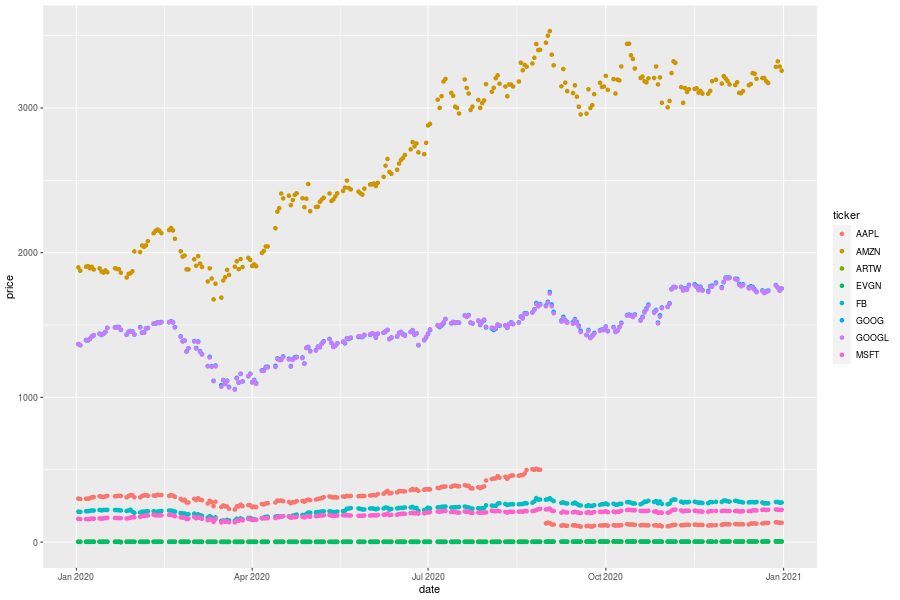

In [28]:
%%R -w 900 -h 600
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(data = stocks) + 
  geom_point(mapping = aes(x = date, y = price, color = ticker))

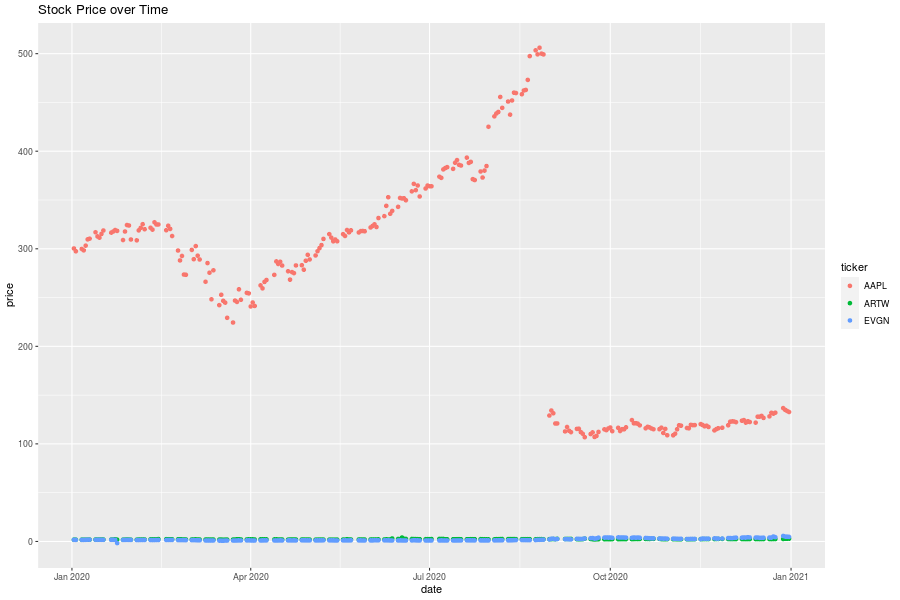

In [29]:
%%R -w 900 -h 600
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
stocks_check <- subset(stocks, stocks$ticker=="EVGN" | stocks$ticker=="AAPL" | stocks$ticker=="ARTW")
ggplot(data = stocks_check) + 
  geom_point(mapping = aes(x = date, y = price, color = ticker)) +
  ggtitle("Stock Price over Time")

Apple had a 4 for 1 split in August 2020

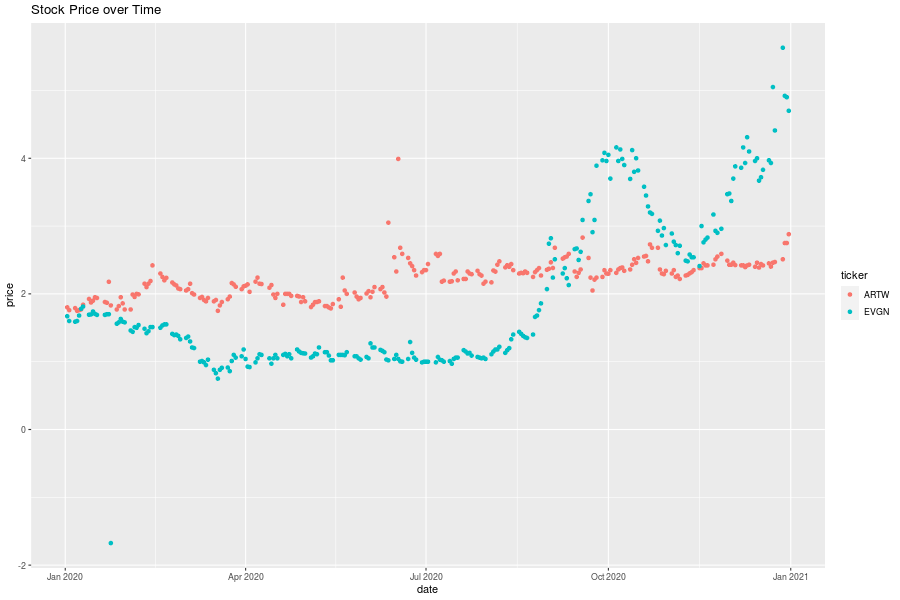

In [136]:
%%R -w 900 -h 600
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
stocks_check <- subset(stocks, stocks$ticker=="EVGN" | stocks$ticker=="ARTW")
ggplot(data = stocks_check) + 
  geom_point(mapping = aes(x = date, y = price, color = ticker)) +
  ggtitle("Stock Price over Time")

There is a negative value in EVGN's stock price. This happened because our data source (CRSP) accounts for low trading volume on a given day by placing a negative in front of the stock price.

# <span style="color:purple">Q7: What kinds of logical checks can we do on stock price? </span>


In [ ]:
%%R
# Check if there are alpha characters in stock price
subset(stocks, grepl("[A-Z]",stocks$price, ignore.case = TRUE)==TRUE)

In [ ]:
%%R
# Check if there are alpha characters in stock price
subset(stocks, stocks$price<0)

# <span style="color:purple">Data Validation Packages </span>


Validation package in R - 
* https://cran.r-project.org/web/packages/validate/vignettes/cookbook.html

<br>

Panderas package in Python -
* https://pandera.readthedocs.io/en/latest/index.html


# <span style="color:purple">Merging Datasets</span>

First, we can merge the two data frames from Yahoo Finance.


In [44]:
%%R
print(length(unique(pr_main$ID)))
print(class(pr_main$ID))
print(colnames(pr_main))
pr_main <- pr_main[,1:4]

print(length(unique(pr_dates$ID)))
print(class(pr_dates$ID))
print(colnames(pr_dates))
pr_dates <- pr_dates[,-2]


[1] 375
[1] "character"
[1] "ID"     "Ticker" "Title"  "Source" "Date"  
[1] 371
[1] "character"
[1] "ID"   "Date"


In [116]:
%%R
install.packages("plyr", repos='http://cran.us.r-project.org', quiet=TRUE)
library(plyr)
prs <- join(pr_main, pr_dates, by="ID", type="left", match="all")
skim(prs)

── Data Summary ────────────────────────
                           Values
Name                       prs   
Number of rows             375   
Number of columns          5     
_______________________          
Column type frequency:           
  character                4     
  Date                     1     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ID                    0         1         3     7     0      375          0
2 Ticker                0         1         2     4     0        7          0
3 Title                 0         1        18   238     0      371          0
4 Source                1         0.997     9    58     0        6          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        med

In [100]:
%%R
subset(prs, is.na(prs$Date))

        ID Ticker
277   FB16     FB
279   FB18     FB
281   FB20     FB
375 MSFT83   MSFT
                                                                                                                                                               Title
277                                                                                                                   Drew Houston Joins Facebook Board of Directors
279 INVESTIGATION REMINDER: The Schall Law Firm Announces it is Investigating Claims Against Facebook, Inc. and Encourages Investors with Losses to Contact the Firm
281    INVESTIGATION ALERT: The Schall Law Firm Announces It Is Investigating Claims Against Facebook, Inc. and Encourages Investors With Losses to Contact the Firm
375                                                                                                                   /C O R R E C T I O N -- Microsoft Corporation/
           Source Date
277   PR Newswire <NA>
279 Business Wire <NA>
281 Business Wir

If we open these articles, we'll see that they were from over 1 year ago and are no longer saved in their full format on Yahoo Finance.

# <span style="color:purple">Identify Financial and Other Press Releases</span>


In [117]:
%%R
colnames(prs)
prs$fin <- grepl("(fiscal|financial|quarter|results)", prs$Title, ignore.case=TRUE)
head(subset(prs, prs$fin==TRUE))

       ID Ticker
1   AAPL1   AAPL
32 AAPL32   AAPL
48 AAPL48   AAPL
55 AAPL55   AAPL
58  AMZN3   AMZN
61  AMZN6   AMZN
                                                                         Title
1                                          Apple Reports First Quarter Results
32                                         Apple Reports Third Quarter Results
48                                        Apple Reports Second Quarter Results
55                                       Investor Update on Quarterly Guidance
58                   Amazon.com Announces Financial Results and CEO Transition
61 Amazon.com to Webcast Fourth Quarter 2020 Financial Results Conference Call
          Source       Date  fin
1  Business Wire 2021-01-27 TRUE
32 Business Wire 2020-07-30 TRUE
48 Business Wire 2020-04-30 TRUE
55 Business Wire 2020-02-17 TRUE
58 Business Wire 2021-02-02 TRUE
61 Business Wire 2021-01-19 TRUE


In [118]:
%%R
prs$other <- ifelse(prs$fin==TRUE, 0, 1)
prs$fin <- ifelse(prs$fin==TRUE, 1, 0)

In [119]:
%%R
subset(prs, prs$fin==1 & prs$other==1)
print(colnames(prs))
prs <- prs[,c(2,5:7)]
print(colnames(prs))

[1] "ID"     "Ticker" "Title"  "Source" "Date"   "fin"    "other" 
[1] "Ticker" "Date"   "fin"    "other" 


In [124]:
%%R
# Let's remove duplicates
print(dim(prs))
prs <- unique(prs)
print(dim(prs))

[1] 375   4
[1] 262   4


In [129]:
%%R
prs <- aggregate(.~Ticker+Date, prs, sum)
print(dim(prs))
subset(prs, prs$fin==1 & prs$other==1)

[1] 251   4
    Ticker       Date fin other
43    MSFT 2020-05-14   1     1
75    AMZN 2020-07-16   1     1
103   EVGN 2020-08-05   1     1
135   MSFT 2020-09-15   1     1
162   AMZN 2020-10-15   1     1
173   AMZN 2020-10-29   1     1
198   EVGN 2020-11-18   1     1
237   AMZN 2021-01-19   1     1
246     FB 2021-01-27   1     1


# <span style="color:purple">Now we can merge the press release and stock datasets</span>


In [88]:
%%R

#prs <- subset(prs, !is.na(prs$Date))
print(colnames(prs))
print(class(prs$Date))
print(min(prs$Date))
print(max(prs$Date))

[1] "ID"     "Ticker" "Title"  "Source" "Date"  
[1] "Date"
[1] NA
[1] NA


In [89]:
%%R
print(colnames(stocks))
names(stocks) <- c("Date", "Ticker", "Price")
print(class(stocks$Date))
print(min(stocks$Date))
print(max(stocks$Date))

[1] "Date"   "ticker" "price" 
[1] "Date"
[1] "2020-01-31"
[1] "2020-12-31"


In [130]:
%%R
prs <- subset(prs, prs$Date<="2020-12-31") 
print(max(prs$Date))

stocks <- subset(stocks, stocks$Date>="2020-01-31") 
print(min(stocks$Date))

[1] "2020-12-29"
[1] "2020-01-31"


In [131]:
%%R
prs <- join(stocks, prs, by=c("Date", "Ticker"), type="left", match="all")
print(dim(prs))
print(dim(stocks))

[1] 1864    5
[1] 1864    3


# <span style="color:purple">How do we determine whether financial press releases affect stock price movements? Any Suggestions for Next Steps? </span>
